## Importing and Preprocessing Data

In [159]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /Users/admin/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

import nltk

In [161]:
# read the data
file_path = os.path.join(path, "Reviews.csv")
df = pd.read_csv(file_path)

print(df)
df = df.head(500000)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

<function matplotlib.pyplot.show(close=None, block=None)>

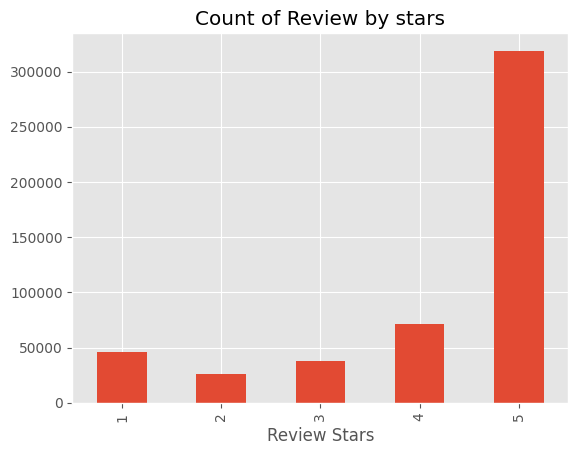

In [162]:

df['Text'][0]
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Review by stars')

ax.set_xlabel('Review Stars')
plt.show

## Basic NLTK

In [163]:
# Trying out an example

example = df['Text'][100]
print(example)

#  Word tokenize the review
tokens = nltk.word_tokenize(example)
print(tokens)

#  Part of speech tag the tokens
tags = nltk.pos_tag(tokens)
tags

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.
['The', 'mouth', 'says', ',', '``', 'How', 'do', 'I', 'love', 'thee', ',', 'let', 'me', 'count', 'the', 'ways', '...', "''", '<', 'br', '/', '>', 'If', 'you', 'like', 'apple', 'products', 'a', 'must', 'have', 'item', '.', 'The', 'only', 'draw', 'back', ',', 'shipping', 'cost', '.', 'These', 'are', 'very', 'heavy', '.']


[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('ways', 'NNS'),
 ('...', ':'),
 ("''", "''"),
 ('<', 'VBZ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 (',', ','),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('.', '.'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ'),
 ('.', '.')]

## 1. VADER Sentiment Analysis

In [164]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [165]:
# Test polarity scores
print("Test random sentence")
score1 = sia.polarity_scores('Children are freakishly cute.')
print(score1)

print('\n')

print("Test dataset example")
print(sia.polarity_scores(example))
# vaders evaluates individual word sentiments rather than connection between the words and evaluating the sentence as a whole


Test random sentence
{'neg': 0.265, 'neu': 0.294, 'pos': 0.441, 'compound': 0.296}


Test dataset example
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}


In [166]:
from tqdm import tqdm

for i in tqdm(range(10)):
    pass
sia.polarity_scores(example)

100%|██████████| 10/10 [00:00<00:00, 455902.61it/s]


{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [167]:
# Run the polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)




100%|██████████| 500000/500000 [02:23<00:00, 3475.15it/s]


In [168]:
# Transposing, indexing and left merging our results with the original dataframe
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how ='left')
print(vaders)



            Id    neg    neu    pos  compound   ProductId          UserId  \
0            1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2            3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3            4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4            5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   
...        ...    ...    ...    ...       ...         ...             ...   
499995  499996  0.035  0.792  0.173    0.9934  B0004N1K48  A26HFSVLAGULIM   
499996  499997  0.053  0.772  0.175    0.5423  B0004N1K48  A1OFNPJKUYOWY7   
499997  499998  0.000  1.000  0.000    0.0000  B0004N1K48   AT1I6IQ1QH115   
499998  499999  0.040  0.678  0.283    0.9368  B0004N1K48   AW4HMRFAJBZ9X   
499999  500000  0.032  0.746  0.222    0.8567  B001CU0N4A  A26LCS1BBLKY9F   

                                          ProfileName  HelpfulnessNumerator

In [169]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## VADER results

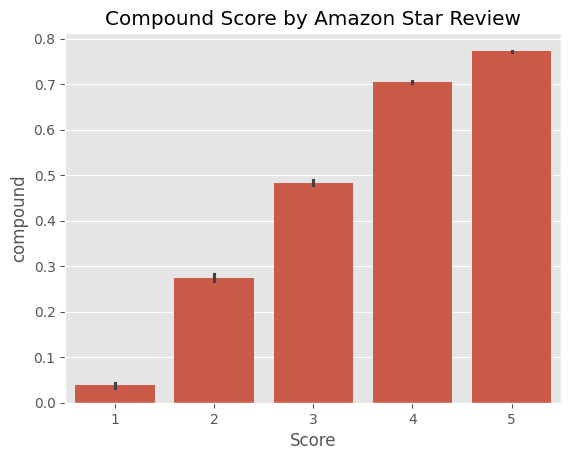

In [157]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

VADER Result- Here, we can see the compound scores even for 1 star rated reviews are low yet positive

/var/folders/cv/390tq0s54699hm5jjmwrgn500000gn/T/ipykernel_98654/3161535701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', palette='Set1', ax = axs[0])
/var/folders/cv/390tq0s54699hm5jjmwrgn500000gn/T/ipykernel_98654/3161535701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', palette='Set1', ax = axs[1])
/var/folders/cv/390tq0s54699hm5jjmwrgn500000gn/T/ipykernel_98654/3161535701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', palett

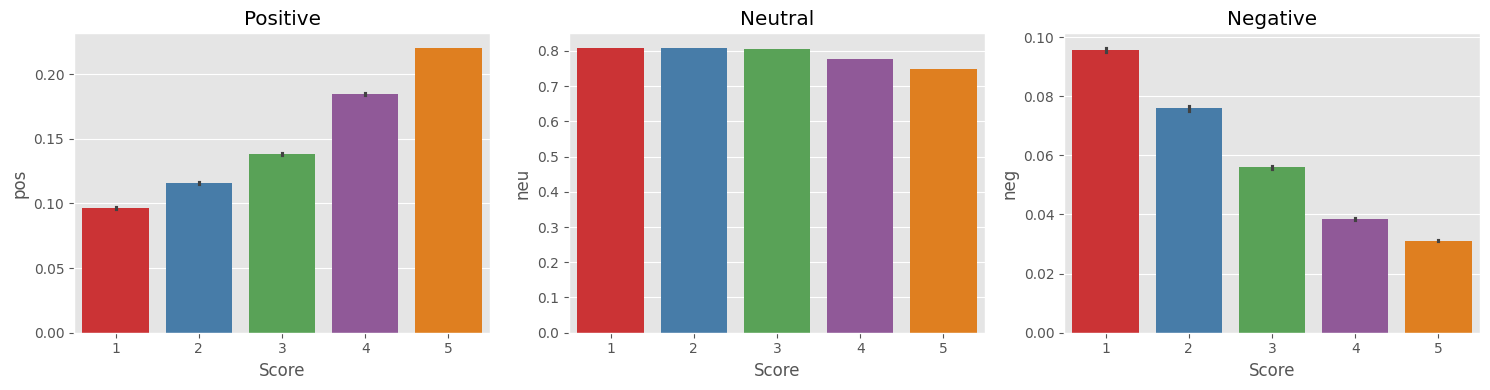

In [158]:
#  Comparing positive, neutral and negative degrees relation with the scores 

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=vaders, x='Score', y='pos', palette='Set1', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', palette='Set1', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', palette='Set1', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

## RoBERTa Pretrained Model Sentiment Analysis

In [189]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch


In [190]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
